In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
newsData = pd.read_csv("train.csv")
newsData.head()

,label,title,text
0,news,China and Economic Reform: Xi Jinping’s Track ...,Economists generally agree: China must overhau...
1,news,Trade to Be a Big Topic in Theresa May’s U.S. ...,LONDON—British Prime Minister Theresa May said...
2,clickbait,"The Top Beaches In The World, According To Nat...",Beaches come in all sorts of shapes and sizes ...
3,clickbait,Sheriff’s Report Provides New Details on Tamir...,"A timeline of what happened after Tamir Rice, ..."
4,news,Surgeon claiming he will transplant volunteer'...,An Italian neurosurgeon who has claimed for mo...


In [3]:
newsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24871 entries, 0 to 24870
Data columns (total 3 columns):
label    24871 non-null object
title    19947 non-null object
text     24788 non-null object
dtypes: object(3)
memory usage: 583.0+ KB


In [4]:
newsData.label.unique()

array(['news', 'clickbait', 'other'], dtype=object)

In [5]:
#removing all rows with unspecified label
newsData = newsData[newsData.label != 'other']

In [6]:
newsData.label.unique()

array(['news', 'clickbait'], dtype=object)

In [7]:
newsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18398 entries, 0 to 24870
Data columns (total 3 columns):
label    18398 non-null object
title    18398 non-null object
text     18330 non-null object
dtypes: object(3)
memory usage: 574.9+ KB


In [8]:
#Cleaning the remaining data
newsData = newsData.dropna(axis=0)
newsData.reset_index(drop=True, inplace=True)
newsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18330 entries, 0 to 18329
Data columns (total 3 columns):
label    18330 non-null object
title    18330 non-null object
text     18330 non-null object
dtypes: object(3)
memory usage: 429.7+ KB


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

In [10]:
X = newsData.title
y = newsData.label

In [11]:
y.head()

0         news
1         news
2    clickbait
3    clickbait
4         news
Name: label, dtype: object

In [12]:
for i in range(18330):
  if y[i]=='clickbait':
    y[i]=True
  else:
    y[i]=False

y=y.astype('bool')

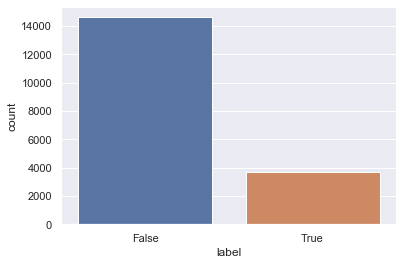

In [13]:
sb.countplot(newsData.label)

In [14]:
from sklearn.metrics import confusion_matrix

In [17]:
def doubleModel(newsData):
  clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,3), min_df=0.001)),
                ('clf', MultinomialNB())])
  
  X = newsData.title
  y = newsData.label
  y=y.astype('bool')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = clf.fit(X_train, y_train)

  y_train_title_pred = clf.predict(X_train)
  y_test_title_pred = clf.predict(X_test)
  
  X = newsData.text
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = clf.fit(X_train, y_train)

  y_train_text_pred = clf.predict(X_train)
  y_test_text_pred = clf.predict(X_test)

  y_train_pred = pd.DataFrame(y_train_title_pred | y_train_text_pred)
  y_test_pred = pd.DataFrame(y_test_title_pred | y_test_text_pred)
  f, axes = plt.subplots(1, 2, figsize=(12, 4))
  sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
  sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

  trainMat = confusion_matrix(y_train, y_train_pred)
  tpTrain, tnTrain, fpTrain, fnTrain = trainMat[1][1], trainMat[0][0], trainMat[0][1], trainMat[1][0]
  testMat = confusion_matrix(y_test, y_test_pred)
  tpTest, tnTest, fpTest, fnTest = testMat[1][1], testMat[0][0], testMat[0][1], testMat[1][0]
    
  fprTrain, fprTest = fpTrain/(tnTrain+fpTrain), fpTest/(tnTest+fpTest)
  fnrTrain, fnrTest = fnTrain/(tpTrain+fnTrain), fnTest/(tpTest+fnTest)
  tprTrain, tprTest = tpTrain/(tpTrain+fnTrain), tpTest/(tpTest+fnTest)
  tnrTrain, tnrTest = tnTrain/(tnTrain+fpTrain), tnTest/(tnTest+fpTest)
    
  print("\t\t\tTrain\tTest")
  print("True Positive Rate: \t%.4f\t%.4f"%(tprTrain, tprTest))
  print("True Negative Rate: \t%.4f\t%.4f"%(tnrTrain, tnrTest))
  print("False Positive Rate:\t%.4f\t%.4f"%(fprTrain, fprTest))
  print("False Negative Rate:\t%.4f\t%.4f"%(fnrTrain, fnrTest))
  print("\n\n")

			Train	Test
True Positive Rate: 	0.8608	0.7729
True Negative Rate: 	0.7243	0.6927
False Positive Rate:	0.2757	0.3073
False Negative Rate:	0.1392	0.2271





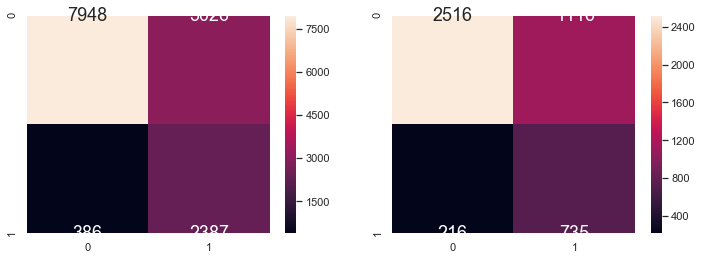

In [18]:
doubleModel(newsData)